# 7. Hafta Lab-2: Yapay Sinir Ağları
## SİB 552: Siber Güvenlik İçin Veri Madenciliği
## Gebze Teknik Üniversitesi - Siber Güvenlik Yüksek Lisans Programı
### Dr. Ferhat Özgür Çatak

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from IPython.display import Image

Using TensorFlow backend.


In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Embedding, Input
from keras.utils import plot_model

In [3]:
# veri kumesini oku
kolon_adlari = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate','label']

verikumesi = pd.read_csv("kddcup99.tar.gz",compression="gzip", names=kolon_adlari, 
low_memory=False, skiprows=1)

In [4]:
# ilgili kolonlari sec
secilecek_kolonlar = ['duration','src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins',
'num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells',
'num_access_files','num_outbound_cmds','count','srv_count','serror_rate','srv_serror_rate',
'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate']
X = verikumesi[secilecek_kolonlar].as_matrix()
Y = verikumesi['label']

c:\users\ozgur\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


### Veri kumesinde bulunan etiketler

In [5]:
classes = " ".join(verikumesi['label'].unique())
num_classes = len(verikumesi['label'].unique())
display(Markdown("**Veri kümesinde bulunan sınıf sayısı**: %d"%num_classes))
display(Markdown("**Sınıflar**: %s"%(classes)))


**Veri kümesinde bulunan sınıf sayısı**: 23

**Sınıflar**: normal. buffer_overflow. loadmodule. perl. neptune. smurf. guess_passwd. pod. teardrop. portsweep. ipsweep. land. ftp_write. back. imap. satan. phf. nmap. multihop. warezmaster. warezclient. spy. rootkit.

### label encoder 

In [6]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [7]:
dummy_y.shape

(494020, 23)

### Yapay sinir ağı modelini oluşturalım

In [8]:
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='sigmoid', kernel_initializer='uniform' ))
model.add(Dense(dummy_y.shape[1], activation='sigmoid', kernel_initializer='uniform'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
#plot_model(model, show_shapes=True, to_file="multiclass.png")
#Image("multiclass.png")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                350       
_________________________________________________________________
dense_2 (Dense)              (None, 23)                253       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X, dummy_y, epochs=30, batch_size=1024, verbose=1, validation_split=0.33)

Instructions for updating:
Use tf.cast instead.
Train on 330993 samples, validate on 163027 samples
Epoch 1/30
330993/330993 [==============================] - 1s 4us/step - loss: 2.0338 - acc: 0.3954 - val_loss: 1.4793 - val_acc: 0.4247
Epoch 2/30
330993/330993 [==============================] - 1s 3us/step - loss: 1.0576 - acc: 0.6392 - val_loss: 1.1516 - val_acc: 0.4247
Epoch 3/30
330993/330993 [==============================] - 1s 3us/step - loss: 0.7573 - acc: 0.6392 - val_loss: 0.9027 - val_acc: 0.4247
Epoch 4/30
330993/330993 [==============================] - 1s 3us/step - loss: 0.6008 - acc: 0.6392 - val_loss: 0.7237 - val_acc: 0.4267
Epoch 5/30
330993/330993 [==============================] - 1s 3us/step - loss: 0.4746 - acc: 0.7912 - val_loss: 0.5406 - val_acc: 0.5833
Epoch 6/30
330993/330993 [==============================] - 1s 3us/step - loss: 0.3512 - acc: 0.9671 - val_loss: 0.3851 - val_acc: 0.9884
Epoch 7/30
330993/330993 [==============================] - 1s 3us/step 

In [11]:
y_pred = model.predict_classes(X)

### Confusion Matrix

In [12]:
pd.set_option('display.max_columns', 500)
cm = confusion_matrix(encoded_Y, y_pred)
cm = pd.DataFrame(cm)
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,2176,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,53,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,8,1,3,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1063,0,0,0,0,0,184,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,15,0,0,0,1,1,0,0,0,0,1,0,1,0,0,2,0,0
7,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,86730,1,9,0,0,0,7,0,20453,1,0,0,0,0


In [13]:
accuracy_score(encoded_Y, y_pred)

0.9534330593903081

### Eğitim tarihçesini inceliyelim.

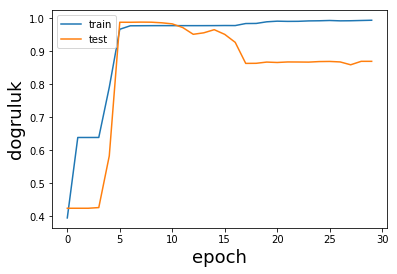

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Kayıp fonksiyonunun değişimi

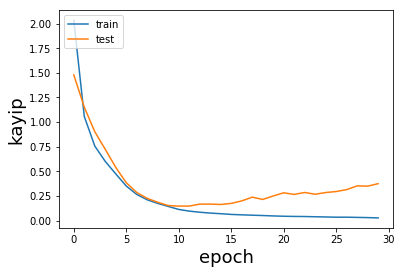

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()